In [1]:
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import copy
import glob
from netCDF4 import Dataset
from cartopy.io.shapereader import Reader
from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter,
                                LatitudeLocator)

In [2]:
nc4filename = 'F:\\CCA\\WRF salidas\\salidas\\2016010622.nc'
datos = Dataset(nc4filename,'r')

In [24]:
print(datos.variables)

In [9]:
psurf = datos["p_sfc"][()]
psurf2 = psurf[0][:][:]
lat = datos["lat"][()]
lon = datos["lon"][()]
print(psurf.shape,lat.shape,lon.shape,psurf2.shape)

(1, 89, 104) (89, 104) (89, 104) (89, 104)


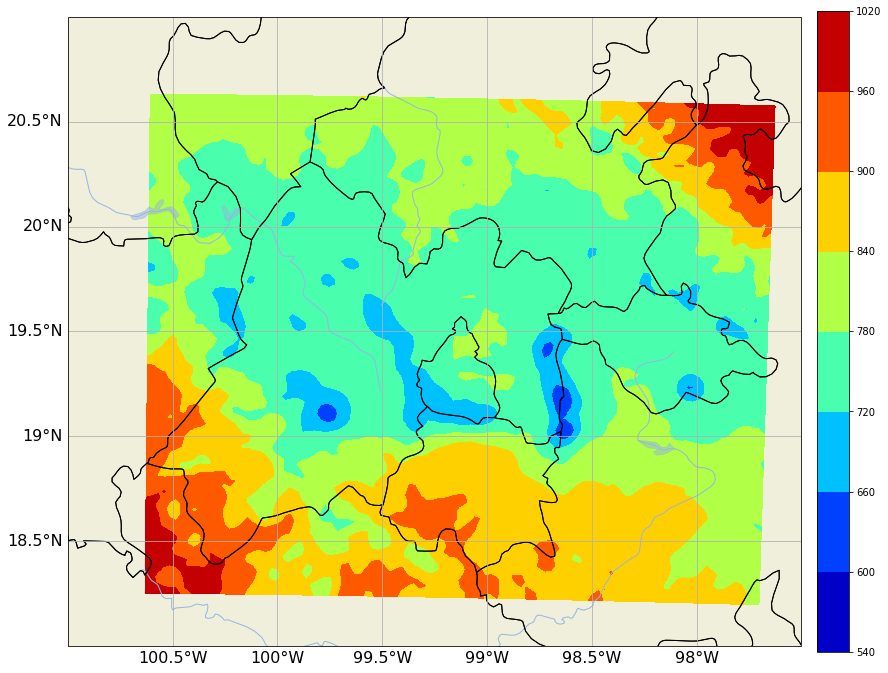

In [22]:
plt.figure(figsize=(14,14))
mxmap1 = plt.axes(projection=ccrs.PlateCarree()) 
mxmap1.add_feature(cfeature.LAND)
mxmap1.add_feature(cfeature.OCEAN)
mxmap1.add_feature(cfeature.COASTLINE)
mxmap1.add_feature(cfeature.BORDERS, linestyle=':')
mxmap1.add_feature(cfeature.LAKES, alpha=0.5)
mxmap1.add_feature(cfeature.RIVERS)
mxmap1.add_feature(cfeature.STATES.with_scale('10m'))
mxmap1.set_extent((-101,-97.5,18,21))
#mxmap1.xaxis.set_visible(True)
#mxmap1.yaxis.set_visible(True)
    
glines1 = mxmap1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
glines1.xformatter = LongitudeFormatter()
glines1.yformatter = LatitudeFormatter()
glines1.top_labels = None
glines1.right_labels = None
glines1.xlabel_style = {'size': 16}
glines1.ylabel_style = {'size': 16}
plt.contourf(lon, lat, psurf2,cmap=plt.get_cmap("jet"),transform=ccrs.PlateCarree())
cbar= plt.colorbar(fraction=0.041, pad=.02)

In [57]:
datos.close()

In [2]:
datapath = "F:\\CCA\\WRF salidas\\salidas\\*.nc"
lista = glob.glob(datapath)
lista.sort()
print(len(lista))
for ii,nc4file in enumerate(lista):
    datos = Dataset(nc4file,'r')
    psurf = datos["p_sfc"][()]
    psurf2 = psurf[0][:][:]
    lat = datos["lat"][()]
    lon = datos["lon"][()]
    #print(psurf.shape,lat.shape,lon.shape,psurf2.shape)
    if ii==0:
        psurfcom = copy.copy(psurf2)
        psurfsum = copy.copy(psurf2)
        #print(np.array_equal(psurf2,psurfcom))
    else:
        #print(ii)
        #print(np.array_equal(psurf2,psurfcom))
        psurfsum = psurfsum+psurf2 
    if ii%500==0:
        print(ii)

8778
0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500


In [4]:
psurfavg = psurfsum/len(lista)

In [9]:
print(lat.shape,lon.shape,psurfavg.shape)

(89, 104) (89, 104) (89, 104)


In [10]:
np.savez('psurf_avg.npz',lon=lon,lat=lat,psurfavg=psurfavg)

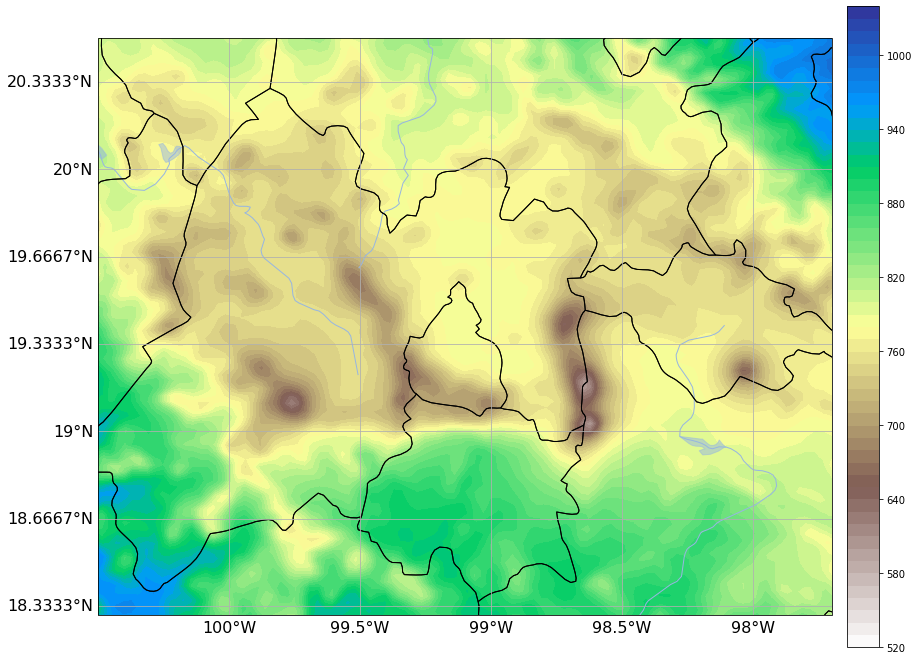

In [56]:
plt.figure(figsize=(14,14))
mxmap1 = plt.axes(projection=ccrs.PlateCarree()) 
mxmap1.add_feature(cfeature.LAND)
mxmap1.add_feature(cfeature.OCEAN)
mxmap1.add_feature(cfeature.COASTLINE)
mxmap1.add_feature(cfeature.BORDERS, linestyle=':')
mxmap1.add_feature(cfeature.LAKES, alpha=0.5)
mxmap1.add_feature(cfeature.RIVERS)
mxmap1.add_feature(cfeature.STATES.with_scale('10m'))
mxmap1.set_extent((-100.5,-97.7,18.3,20.5))
#mxmap1.xaxis.set_visible(True)
#mxmap1.yaxis.set_visible(True)
    
glines1 = mxmap1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
glines1.xformatter = LongitudeFormatter()
glines1.yformatter = LatitudeFormatter()
glines1.top_labels = None
glines1.right_labels = None
glines1.xlabel_style = {'size': 16}
glines1.ylabel_style = {'size': 16}
lvls = np.arange(520,1050,10)
plt.contourf(lon, lat, psurfavg,levels = lvls,cmap=plt.get_cmap("terrain_r"),transform=ccrs.PlateCarree())
cbar= plt.colorbar(fraction=0.041, pad=.02)